Upload the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 14)
general = pd.read_csv('data/general.csv')
prenatal = pd.read_csv('data/prenatal.csv')
sports = pd.read_csv('data/sports.csv')

To merge tables, we need to change the column names. In 'general' table height of patients represented in meters, converting it into feet like in other tables

In [2]:
general.height = general.height * 3.28
prenatal = prenatal.rename(columns = {'HOSPITAL': 'hospital', 'Sex': 'gender'})
sports = sports.rename(columns= {'Hospital': 'hospital', 'Male/female': 'gender'})

united_table = pd.concat([general, prenatal, sports], ignore_index=True)
united_table = united_table.drop(columns=['Unnamed: 0'])

Working with NaN values and unifying values in gender column

In [3]:
united_table = united_table.dropna(thresh=1)
united_table['gender'].replace({'female': 'f', 'woman': 'f', 'man': 'm', 'male': 'm'}, inplace=True)
united_table['gender'].fillna('f', inplace=True)
united_table.loc[:, 'bmi':'months'] = united_table.loc[:, 'bmi':'months'].fillna(0)


Working with data to answer following questions:
1. Which hospital has the highest number of patients?
2. What share of the patients in the general hospital suffers from stomach-related issues?
3. What share of the patients in the sports hospital suffers from dislocation-related issues?
4. What is the difference in the median ages of the patients in the general and sports hospitals?
5. After data processing at the previous stages, the blood_test column has three values: t= a blood test was taken, f= a blood test wasn't taken, and 0= there is no information. In which hospital the blood test was taken the most often (there is the biggest number of t in the blood_test column among all the hospitals)? How many blood tests were taken?

In [4]:
pivot_1 = united_table.value_counts(subset='hospital').idxmax()
print(f'The answer to the 1st question is {pivot_1}')

pivot_2 = round(united_table.query("hospital == 'general' and diagnosis == 'stomach'").shape[0] / united_table.query("hospital == 'general'").shape[0], 3)
print(f'The answer to the 2nd question is {pivot_2}')

pivot_3 = round(united_table.query("hospital == 'sports' and diagnosis == 'dislocation'").shape[0] / united_table.query("hospital == 'sports'").shape[0], 3)
print(f'The answer to the 3rd question is {pivot_3}')

pivot_4 = round(united_table.groupby('hospital').agg({"age":"median"}).loc['general', 'age'] - united_table.groupby('hospital').agg({"age":"median"}).loc['sports', 'age'], )
print(f'The answer to the 4th question is {pivot_4}')

pivot_5 = united_table.pivot_table(index=['hospital', 'blood_test'], values='gender', aggfunc='count').query("blood_test == 't'")
max_value = pivot_5.gender.max()
max_hospital = pivot_5.gender.idxmax()
print(f'The answer to the 5th question is {max_hospital[0]}, {max_value} blood tests')

The answer to the 1st question is general
The answer to the 2nd question is 0.325
The answer to the 3rd question is 0.285
The answer to the 4th question is 19
The answer to the 5th question is prenatal, 325 blood tests


Visualisation to answer the following questions:
1. What is the most common age of a patient among all hospitals? Choose one of the following age ranges: 0-15, 15-35, 35-55, 55-70, or 70-80
2. What is the most common diagnosis among patients in all hospitals?
3. Build a violin plot of height distribution by hospitals. What is the main reason for the gap in values?

The answer to the 1st question: 15-35
The answer to the 2nd question: pregnancy


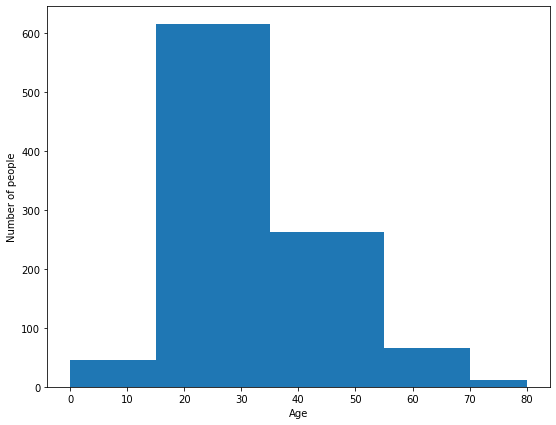

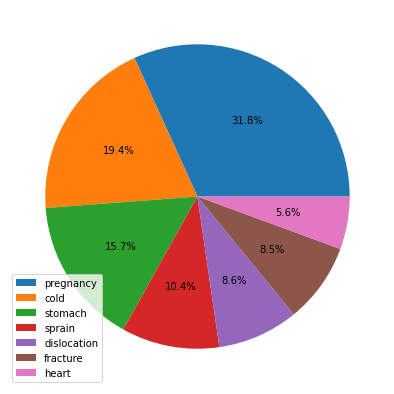

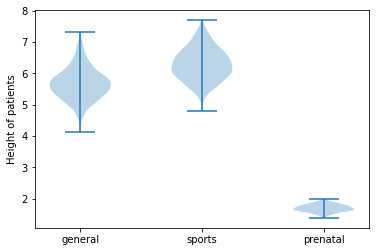

The answer to the 3rd question: the main reason for the gap in values between hospitals is that patients of prenatal hospital are newborn and their height is 1-2 feet but general and sports hospitals are for adults only.


In [5]:
bins_list = [0, 15, 35, 55, 70, 80]
age = united_table.age
plt.figure(1, figsize=(9, 7))
plt.hist(age, bins=bins_list)
plt.ylabel("Number of people")
plt.xlabel("Age")
print('The answer to the 1st question: 15-35')

diagnosis_table = pd.DataFrame(united_table.diagnosis.value_counts())
diagnosis = diagnosis_table.diagnosis
labels = ['pregnancy', 'cold', 'stomach', 'sprain', 'dislocation', 'fracture', 'heart']
plt.figure(2, figsize=(9, 7))
plt.pie(diagnosis, autopct='%.1f%%', radius=1)
plt.title = 'Diagnosis distribution'
plt.legend(labels, loc="lower left")
print('The answer to the 2nd question: pregnancy')

height_general = united_table.query("hospital == 'general'")
height_sports = united_table.query("hospital == 'sports'")
height_prenatal = united_table.query("hospital == 'prenatal'")
data_list = [height_general.height, height_sports.height, height_prenatal.height]
fig, axes = plt.subplots()
plt.violinplot(data_list)
axes.set_xticks((1, 2, 3))
axes.set_xticklabels(('general', 'sports', 'prenatal'))
axes.set_ylabel("Height of patients")

plt.show()

print('The answer to the 3rd question: the main reason for the gap in values between hospitals is that patients of prenatal hospital are newborn and their height is 1-2 feet but general and sports hospitals are for adults only.')
